In [1]:
%matplotlib inline
import sys
sys.path.append('C:/YandexDisk/Work/RevoBigScorring/')

from tempfile import TemporaryFile
import pandas as pd
import numpy as np
import os
import getpass
import pyodbc
import datetime
import matplotlib
import matplotlib.pyplot as plt

from sklearn.utils import check_consistent_length, column_or_1d, check_array
import Buckets as bc
import woe
import scoringfunctions as sf
import bsfunctions as bs
import time
import random
from scipy import stats
from math import log

from sklearn.utils.fixes import isclose
from sklearn import metrics as met
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import KFold
from pylab import rcParams
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.cross_validation import cross_val_score, train_test_split
from sklearn.feature_selection import RFE
rcParams['figure.figsize'] = 7, 7
pd.options.mode.chained_assignment = None

In [2]:
src = pd.read_csv('src.csv')
oot = pd.read_csv('oot.csv')
preWoe = pd.read_csv('preWoe.csv')
clustInfo = pd.read_csv('clustInfo.csv')
postWoe = pd.read_csv('postWoe.csv')
woeInfo = pd.read_csv('woeInfo.csv')
decl = pd.read_csv('decl.csv')
firstDeclineRule = pd.read_csv('C:/YandexDisk/Work/RevoBigScorring/FirstDeclineRule.csv',delimiter=';')

In [3]:
badFlag = 'badMob3'

C:\Users\e.migaev\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


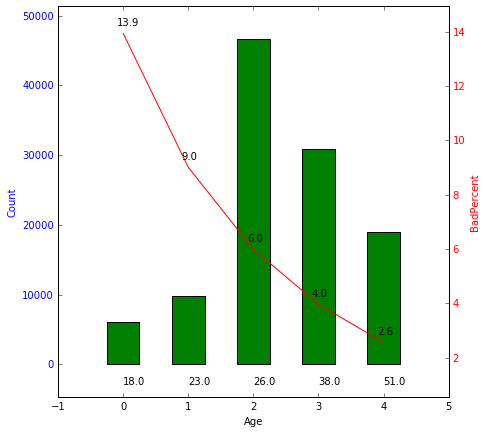

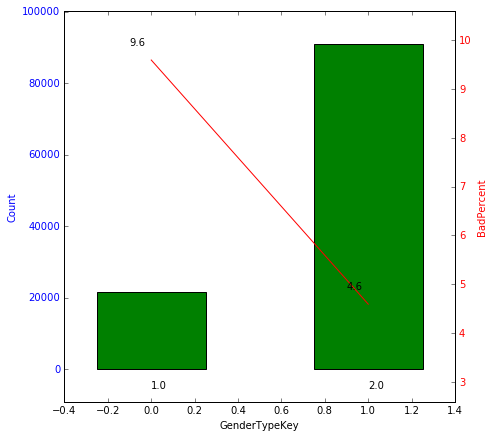

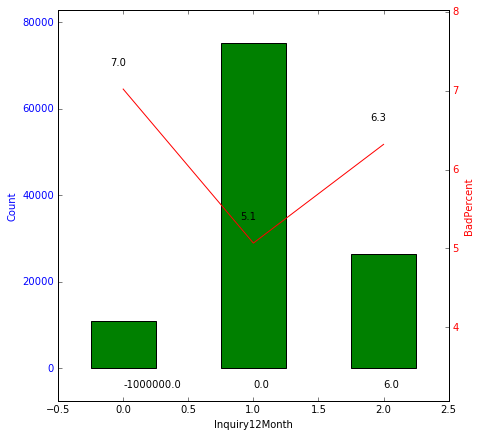

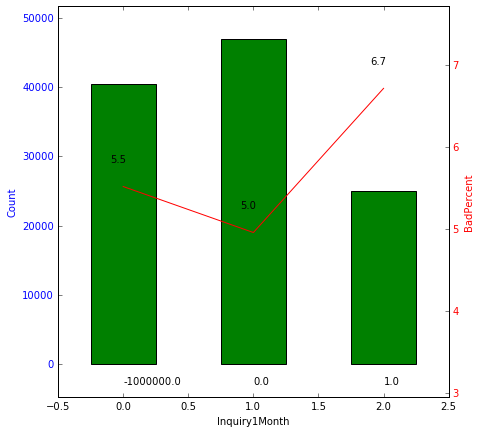

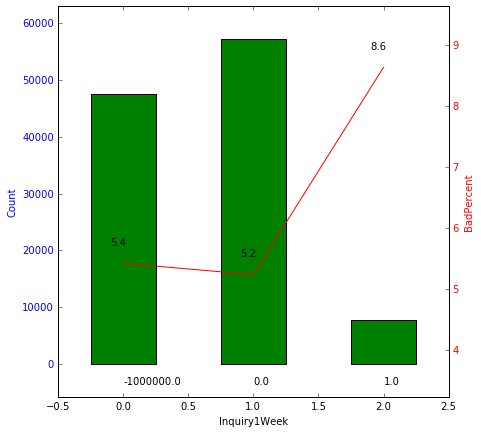

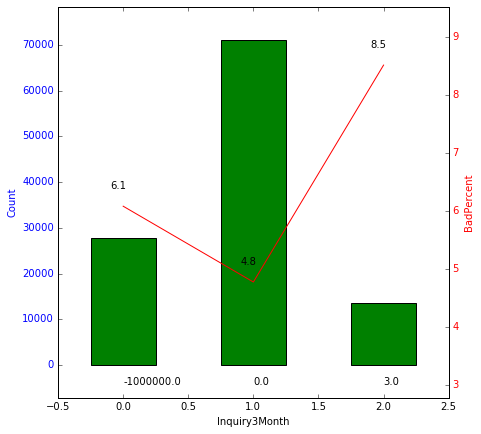

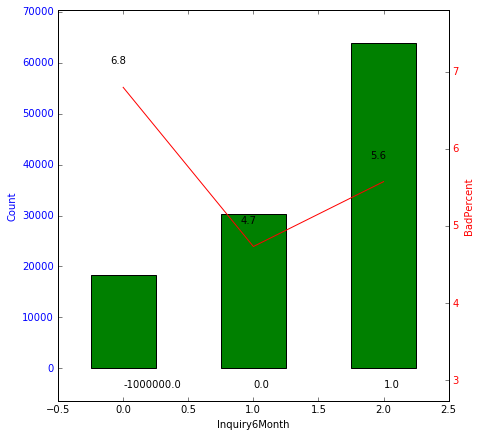

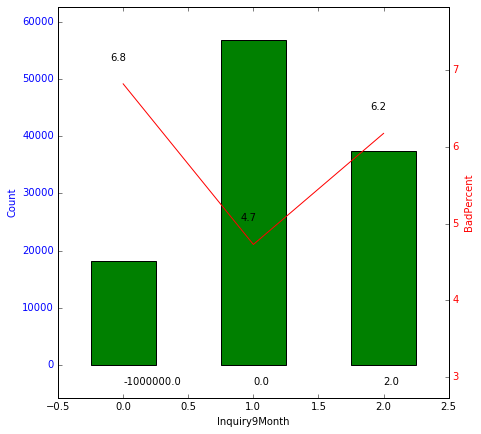

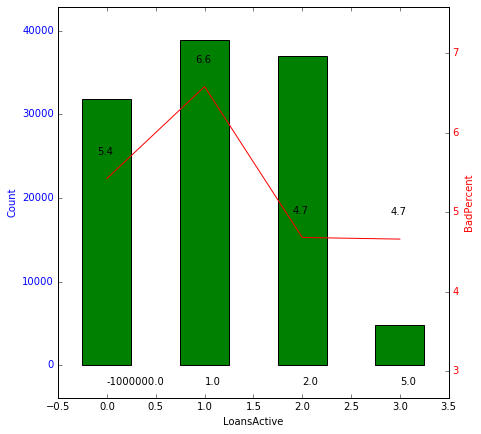

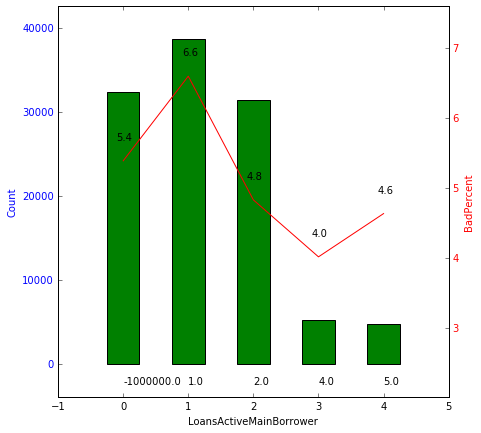

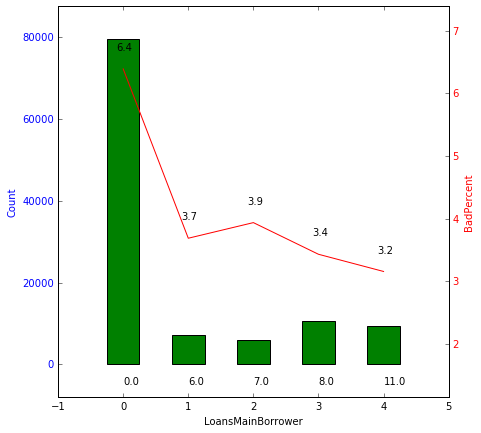

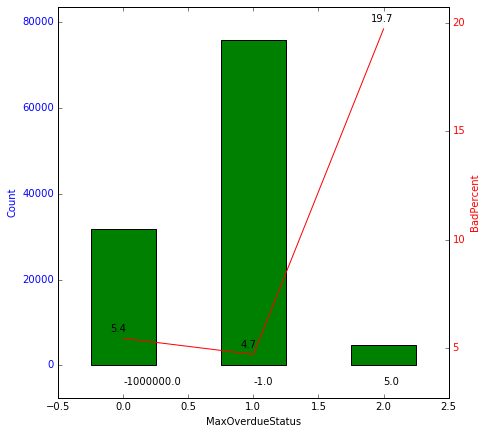

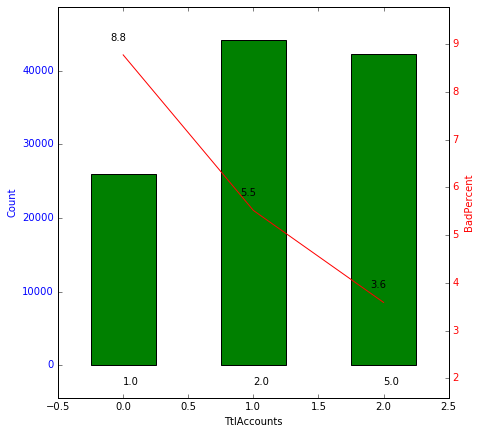

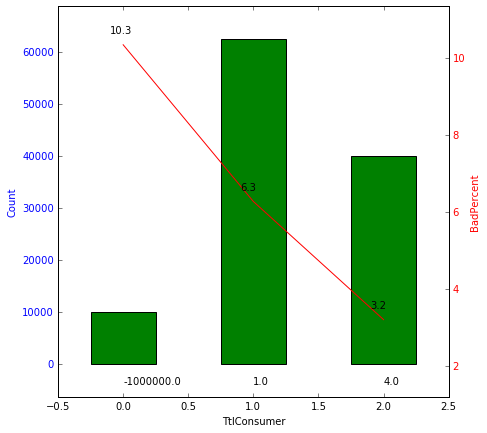

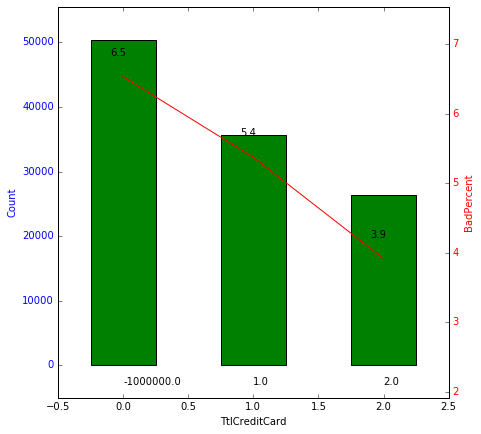

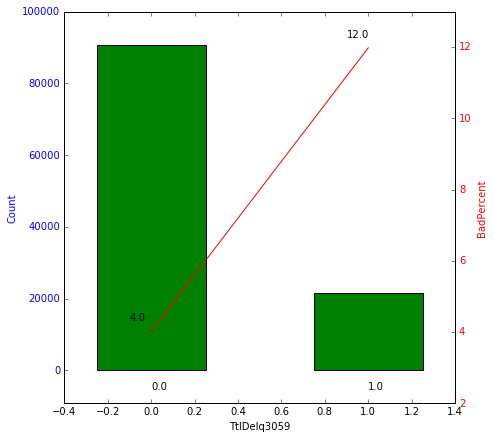

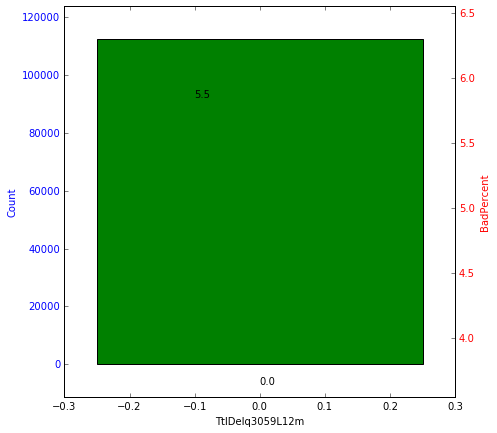

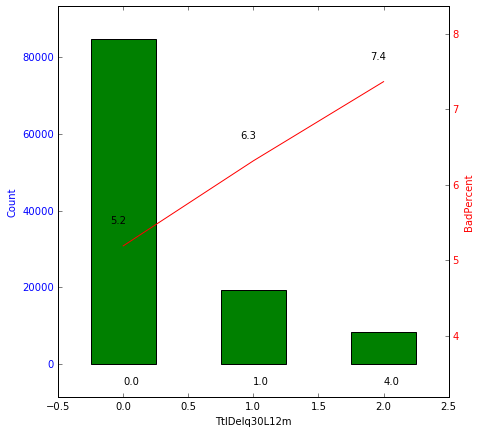

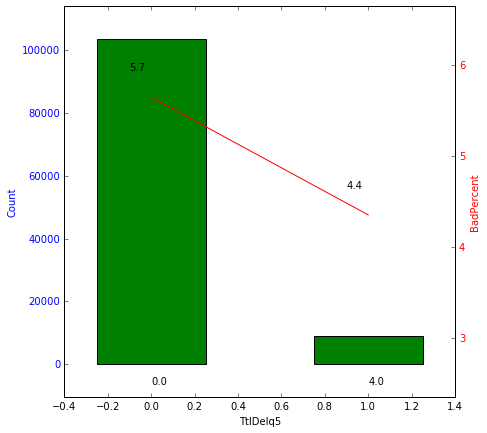

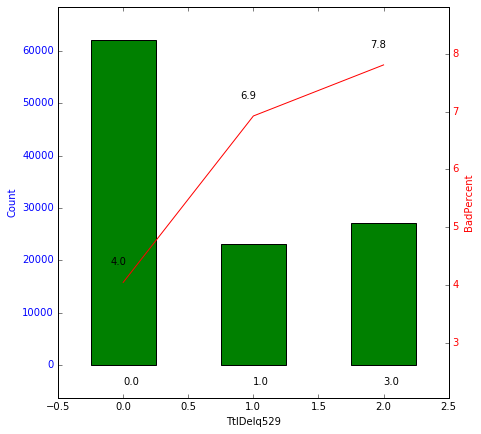

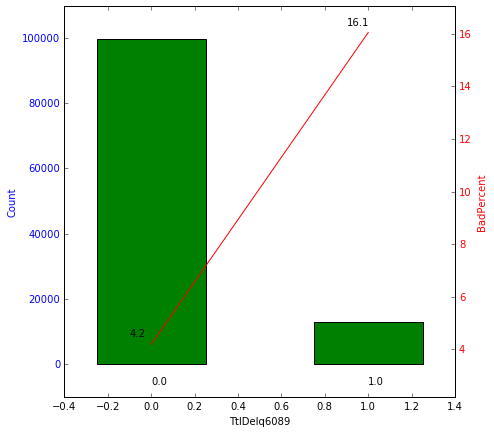

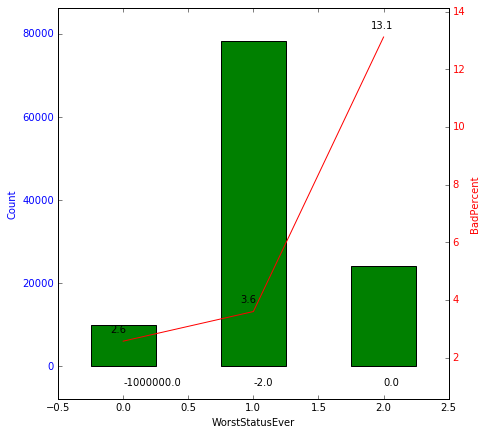

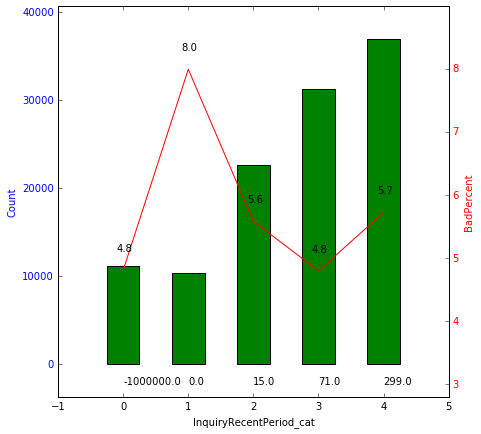

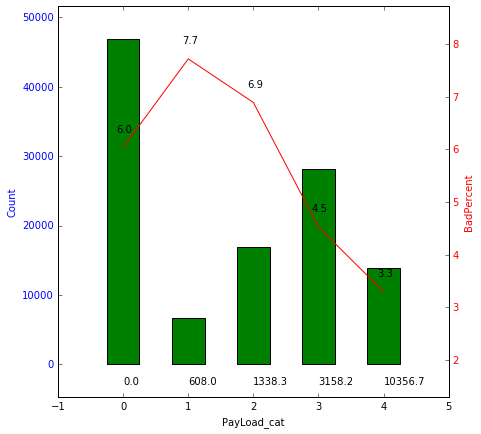

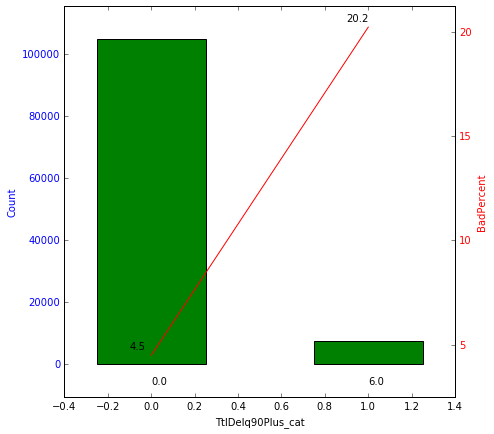

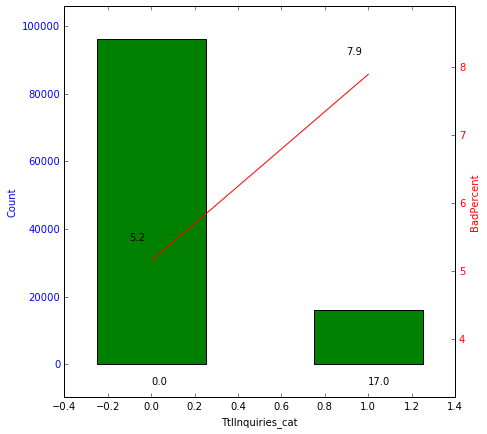

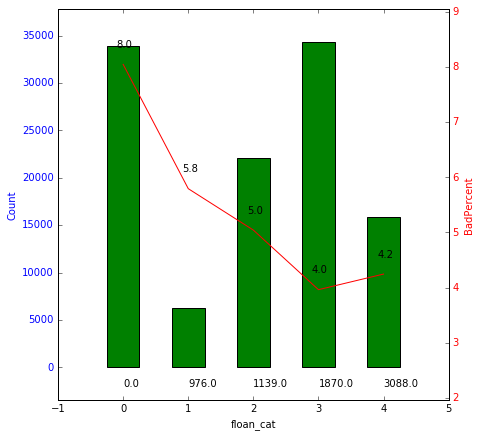

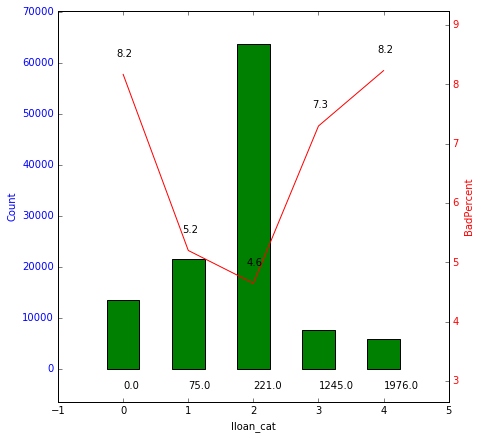

In [9]:
woe.twinPlotWoe(woeInfo)

In [4]:
newPositions = {
    'LoansActive':[0,1,2],
    'LoansActiveMainBorrower':[0,1,2,3],
    'LoansMainBorrower':[0,1,3],
    'InquiryRecentPeriod_cat' : [0,1,2],
    'floan_cat' : [0,1,2,3] 
               }

In [5]:
woeInfoTrans = woe.transformWoeVarsInfo(woeInfo,newPositions)
postWoeTransform = sf.getWOEcolumnAfterTransform(preWoe,woeInfoTrans)

C:\Users\e.migaev\Anaconda3\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


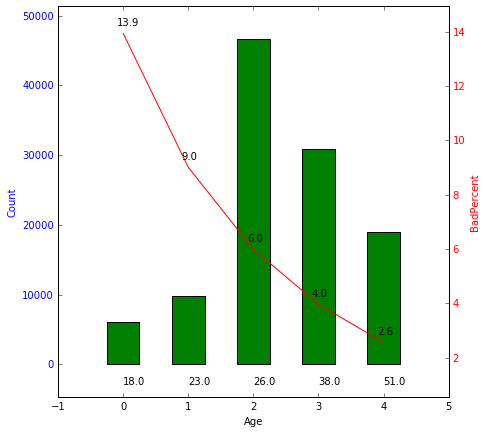

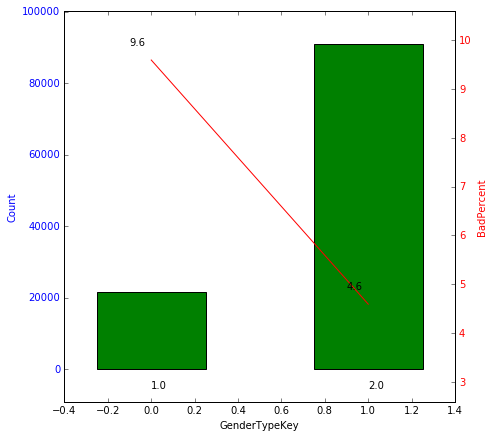

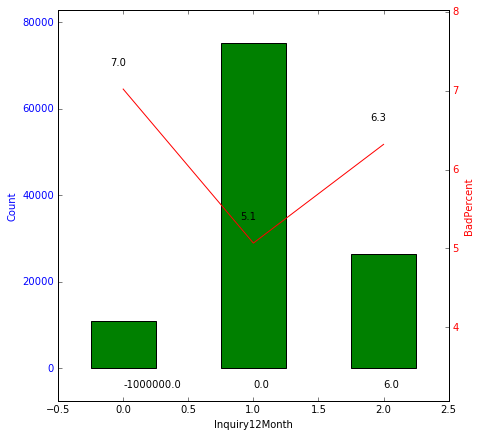

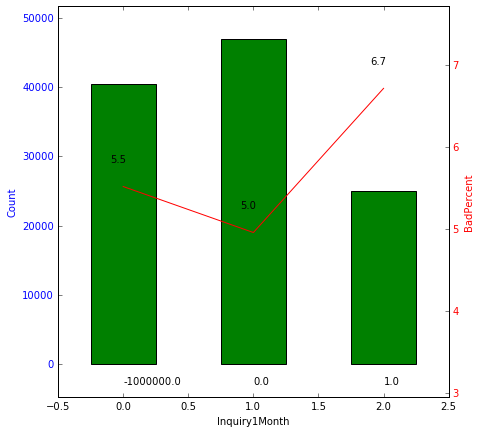

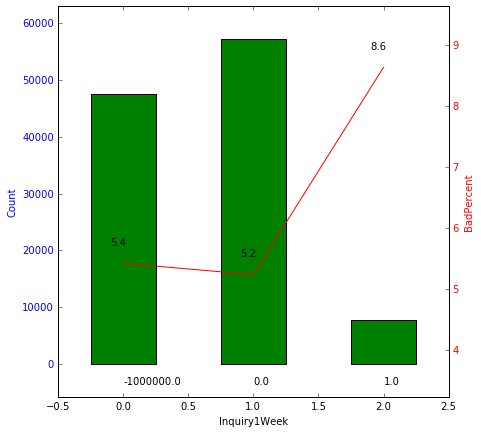

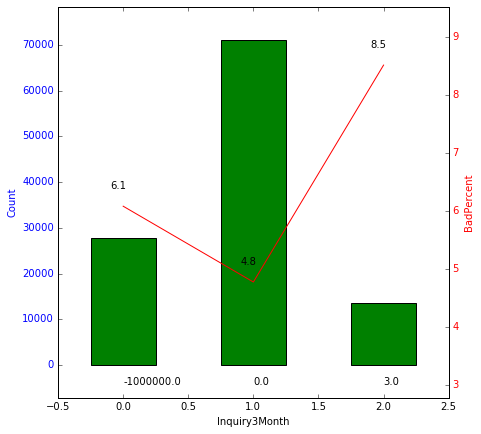

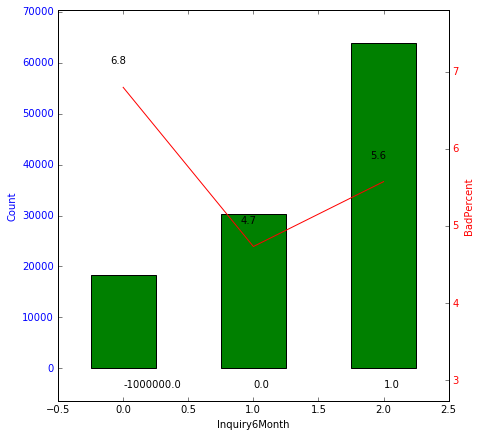

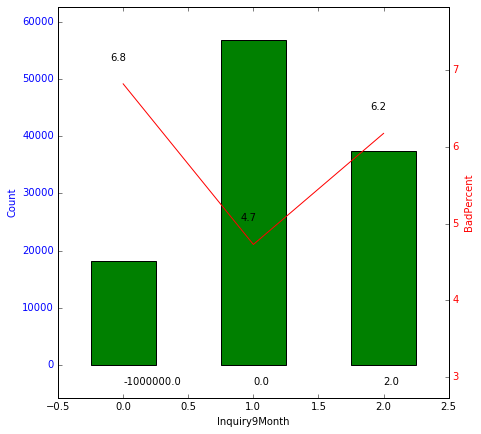

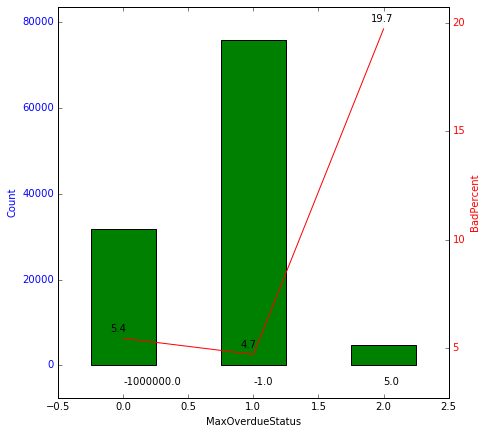

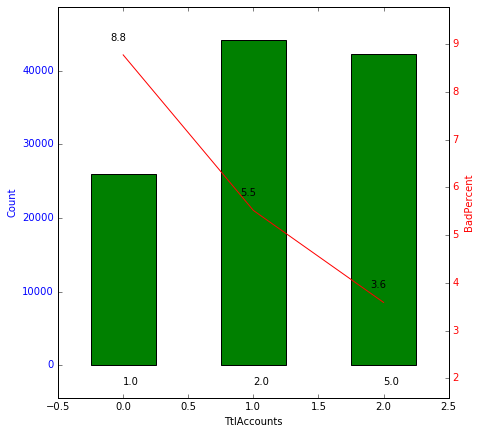

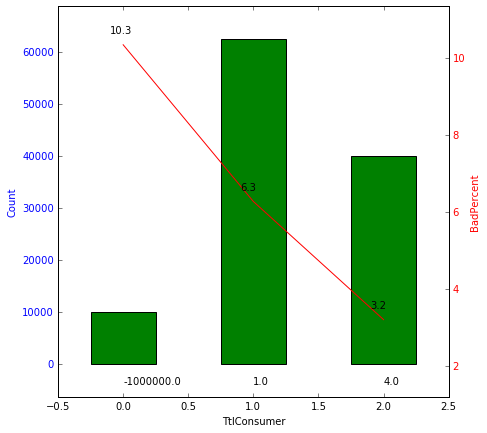

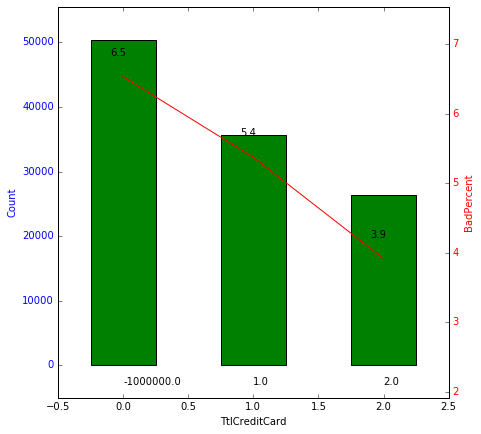

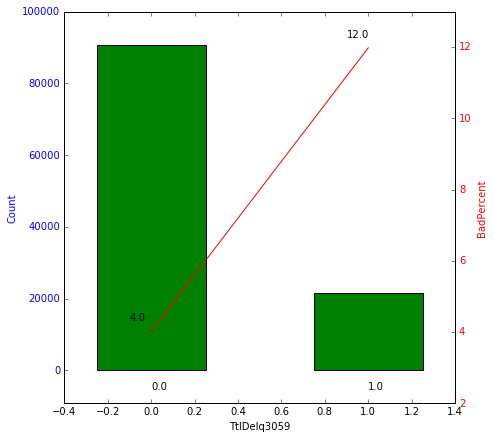

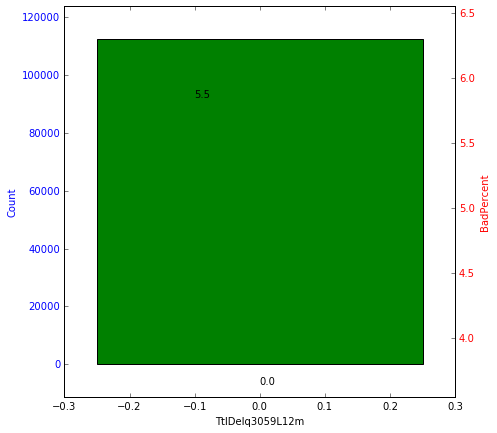

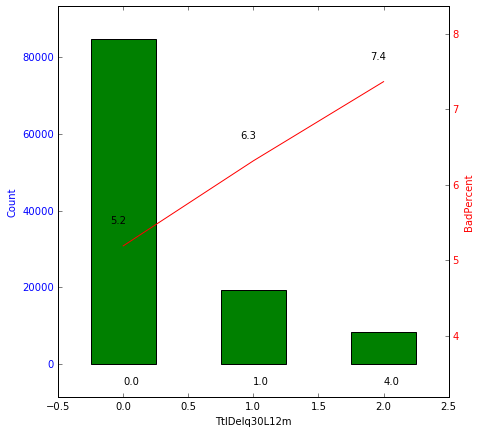

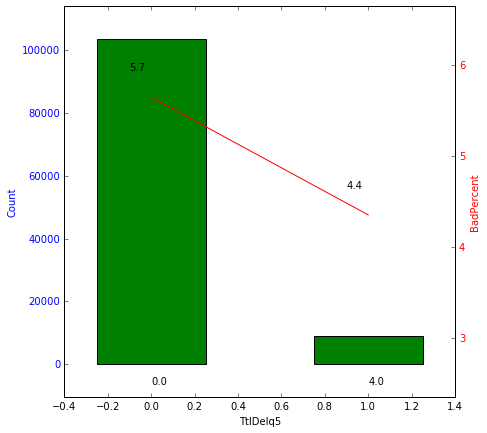

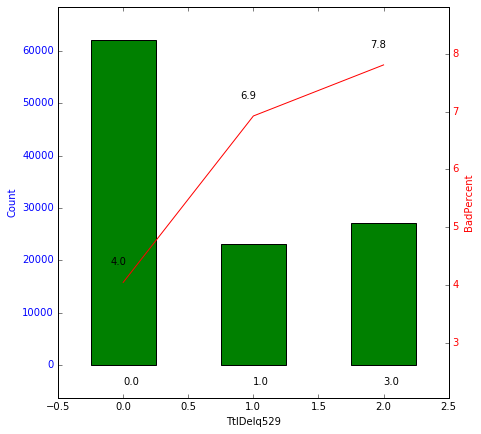

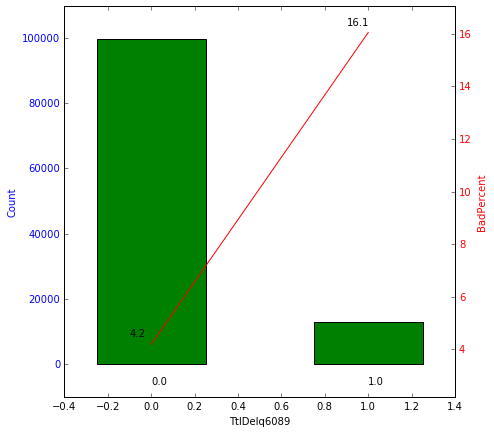

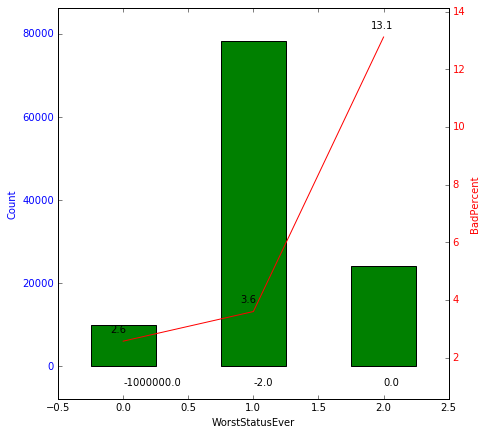

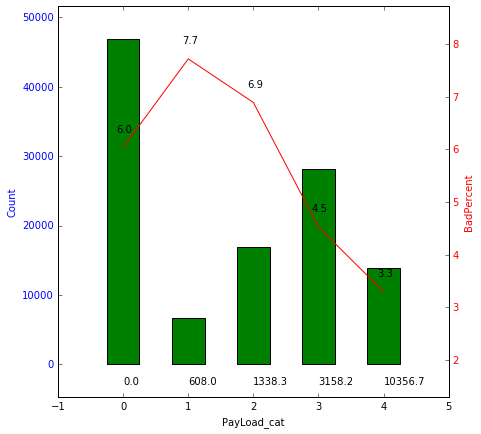

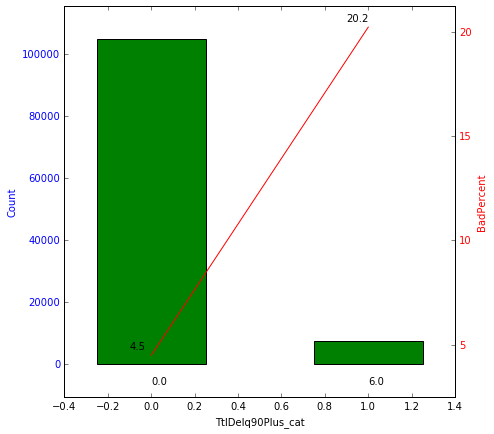

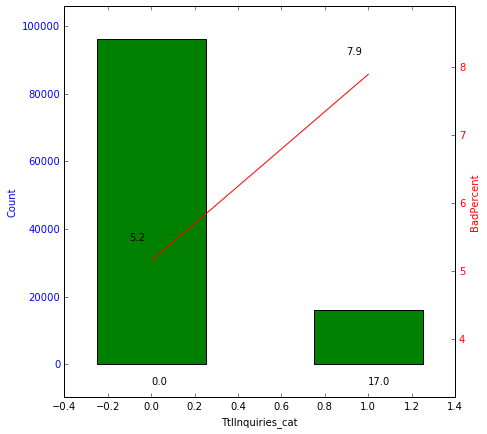

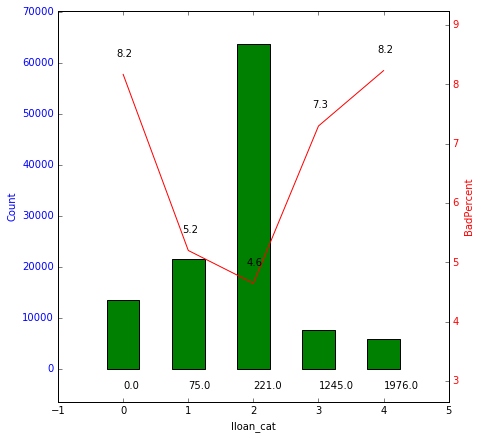

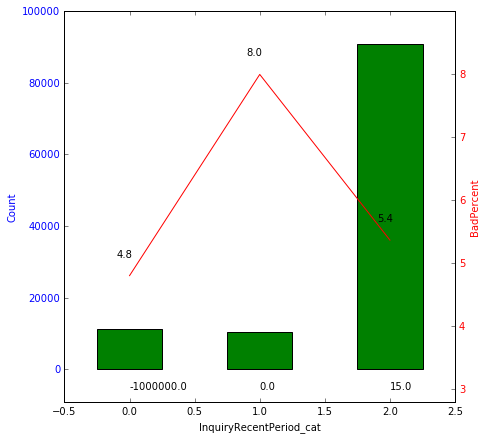

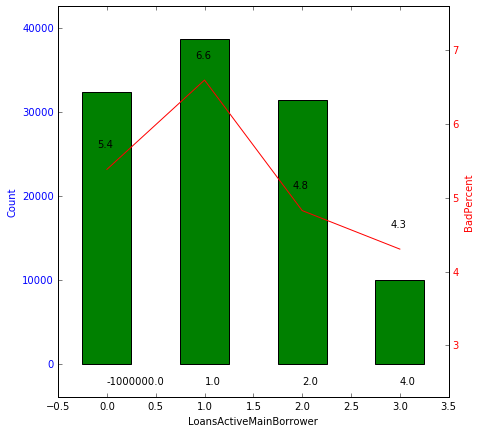

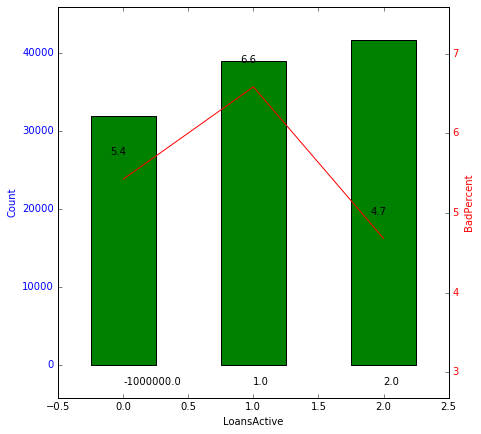

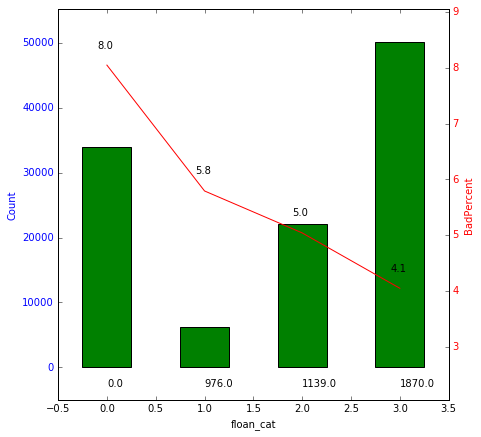

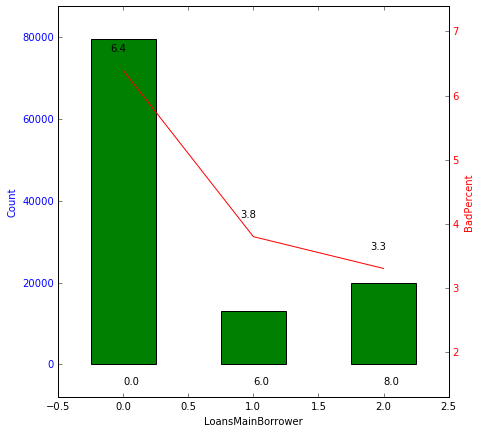

In [8]:
woe.twinPlotWoe(woeInfoTrans)

In [6]:
informationTable = sf.giniGrowth(postWoeTransform, woeInfoTrans, badFlag)

In [13]:
informationTable

,variable,informationValue,testDiff,trainDiff,giniTest,giniTrain
18,WorstStatusEver_WOE,0.450631,3.319710e-01,0.317098,0.331971,0.317098
17,TtlDelq6089_WOE,0.336753,1.454502e-02,0.017248,0.346516,0.334346
20,TtlDelq90Plus_cat_WOE,0.317237,1.018609e-02,0.006978,0.356702,0.341324
12,TtlDelq3059_WOE,0.278970,-4.893707e-03,-0.006062,0.351808,0.335262
0,Age_WOE,0.227307,1.610296e-01,0.162772,0.512838,0.498034
8,MaxOverdueStatus_WOE,0.181991,2.575477e-03,0.001754,0.515414,0.499789
10,TtlConsumer_WOE,0.154997,4.414378e-02,0.046488,0.559557,0.546277
9,TtlAccounts_WOE,0.134472,7.993693e-03,0.012344,0.567551,0.558621
1,GenderTypeKey_WOE,0.116647,9.493854e-03,0.022267,0.577045,0.580888
16,TtlDelq529_WOE,0.103837,9.303422e-03,0.010000,0.586348,0.590888


In [7]:
CorrKoef = postWoe.corr()

CorField = []
for i in CorrKoef:
    for j in CorrKoef.index[CorrKoef[i] > 0.6]:
        if i != j and j not in CorField and i not in CorField:
            CorField.append(j)
            print ("%s-->%s: r^2=%f" % (i,j, CorrKoef[i][CorrKoef.index==j].values[0]))

Inquiry1Week_WOE-->InquiryRecentPeriod_cat_WOE: r^2=0.720176
Inquiry6Month_WOE-->Inquiry9Month_WOE: r^2=0.759546
LoansActive_WOE-->LoansActiveMainBorrower_WOE: r^2=0.956972
LoansMainBorrower_WOE-->TtlAccounts_WOE: r^2=0.695850
LoansMainBorrower_WOE-->TtlConsumer_WOE: r^2=0.711600
TtlDelq3059_WOE-->TtlDelq6089_WOE: r^2=0.662773
TtlDelq3059_WOE-->WorstStatusEver_WOE: r^2=0.814703


In [7]:
goodColumns= list(informationTable[informationTable['testDiff']>0.002].variable.values) + [badFlag]
goodColumns = [x for x in goodColumns if x not in ['lloan_cat_WOE','PayLoad_cat_WOE']]

## Total variables:

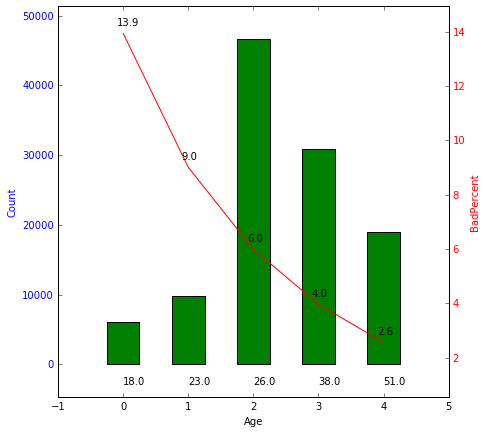

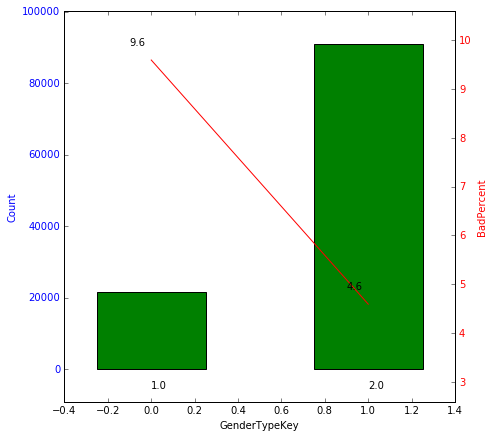

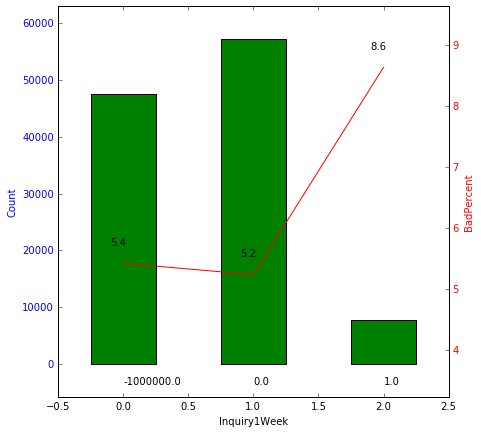

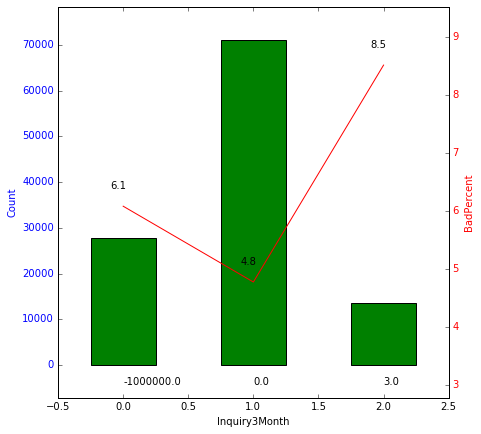

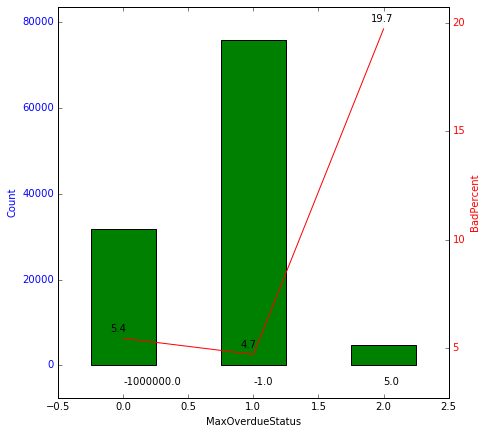

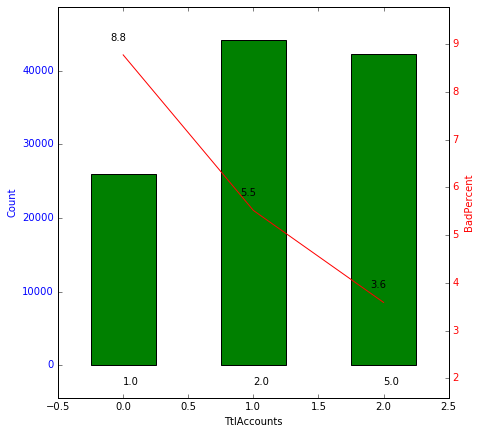

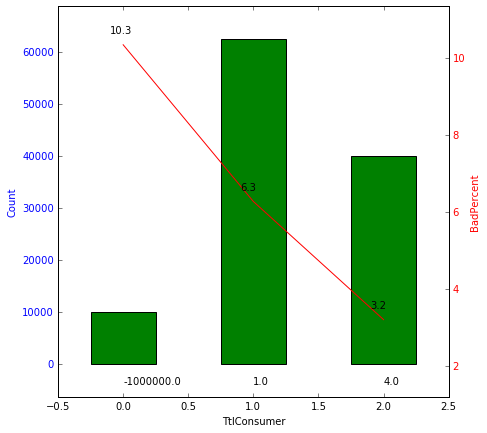

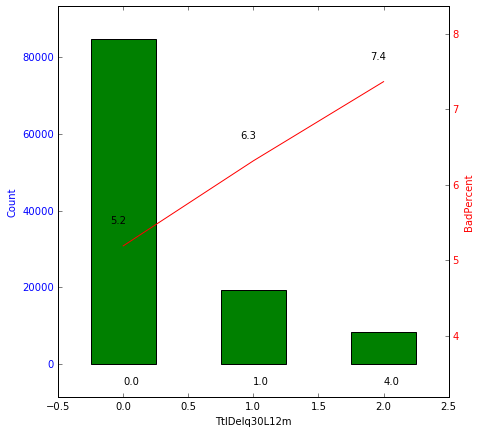

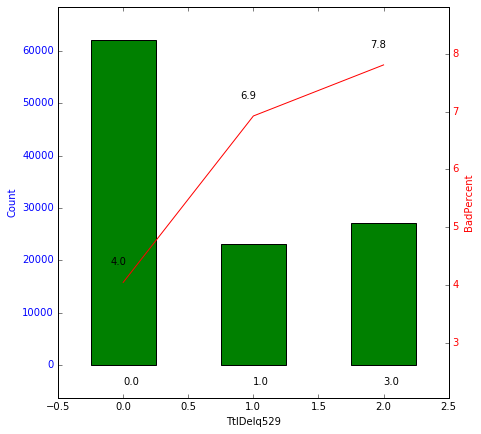

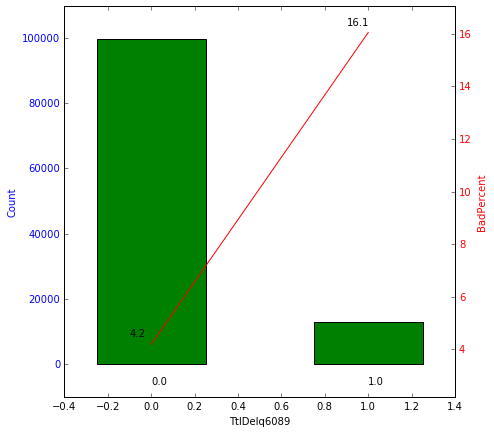

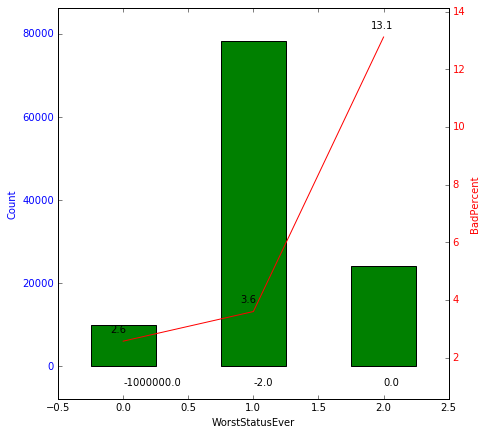

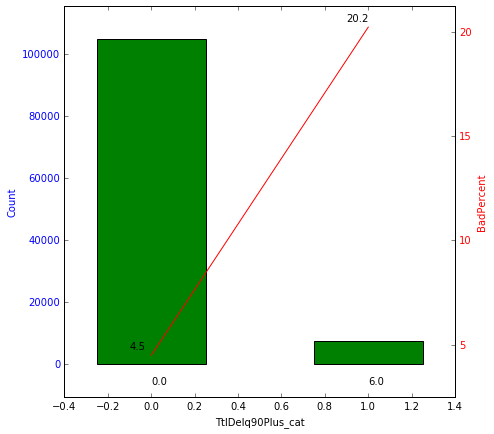

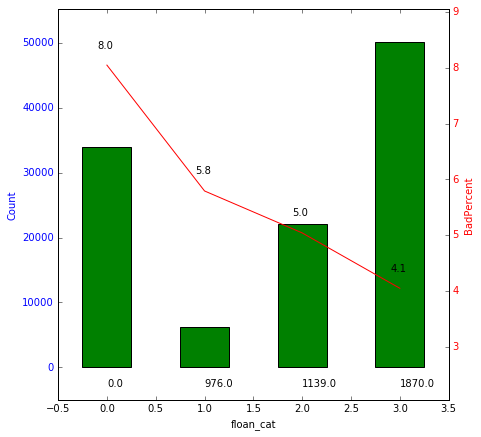

In [9]:
goodColumns1 = [x[:-4] for x in goodColumns]
woe.twinPlotWoe(woeInfoTrans[woeInfoTrans.variable.isin(goodColumns1)])

In [10]:
preLR = postWoeTransform[goodColumns]
woeInfoPreLR = woeInfoTrans[woeInfoTrans['variable'].apply(lambda x:x+'_WOE').isin(goodColumns)]

In [137]:
woeInfoTrans.to_csv('woeTransform.csv',index=False)
goodColumnsOut = [x for x in goodColumns if x not in ['badFpd','badMob3']] + ['badMob3']
f = open('goodColumns.txt', 'w')
for i in goodColumnsOut:
    f.write(i+',')
f.close()

In [11]:
goodColumns.remove(badFlag)
goodColumns.append('badFpd')
ootTransform = sf.ootTransform(oot,clustInfo,woeInfoTrans,goodColumns)

In [12]:
y = preLR[badFlag].values

preLRvar = preLR.drop(badFlag,axis=1)

X = preLRvar.values
clmn = list(preLRvar.columns)
fi = sf.featureImportance(X,y,clmn)

Xoot = ootTransform.drop('badFpd',axis=1).values
yoot = ootTransform.badFpd.values

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=3)

In [16]:
kf = KFold(n= len(y),n_folds=5,random_state=1,shuffle=True)
ans_LR = {'C':[],'val':[], 'time' : []}
grid = np.arange(0.1, 1, 0.1)
for i in grid:
    ans_LR['C'].append(i)
    start_time = datetime.datetime.now()
    ans_LR['val'].append(cross_val_score(estimator=LogisticRegression(C=i,random_state=1),scoring='roc_auc',X=X,y=y,cv=kf).mean())
    ans_LR['time'].append(datetime.datetime.now() - start_time)
ans_LR_df = pd.DataFrame(ans_LR)
ans_LR_df.sort_values('val',ascending=False).head(1)

,C,time,val
0,0.1,00:00:15.138178,0.818054


In [14]:
lr = LogisticRegression(C=0.1)
lr.fit(X_train,y_train)
pr_test = lr.predict_proba(X_test)[:,1]
pr_train = lr.predict_proba(X_train)[:,1]
pr_fpd = lr.predict_proba(Xoot)[:,1]

------------------------------------------------------------
train:


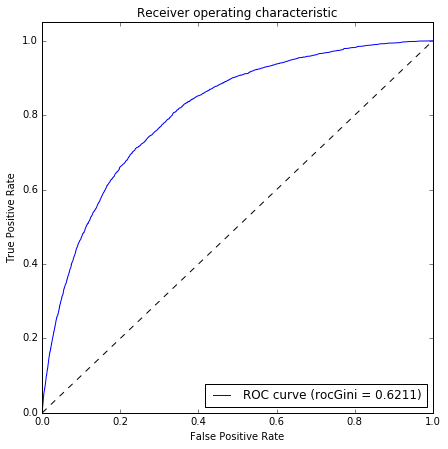

------------------------------------------------------------
test:


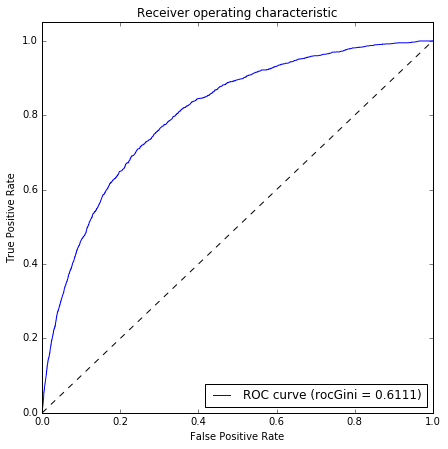

------------------------------------------------------------
out of time:


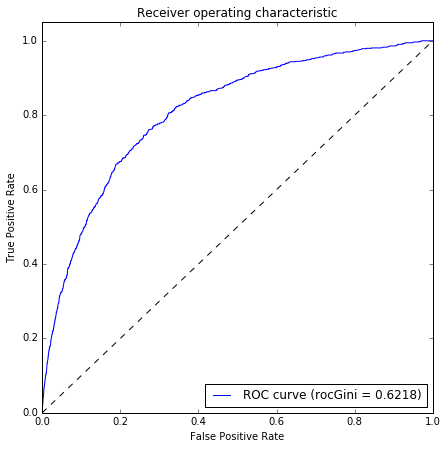

In [15]:
print('-'*60)
print("train:")
sf.rocCurve(y_train,pr_train)
print('-'*60)
print("test:")
sf.rocCurve(y_test,pr_test)
print('-'*60)
print("out of time:")
sf.rocCurve(yoot,pr_fpd)

In [26]:
kariMob3 = pd.read_csv('C:/YandexDisk/Work/RevoBigScorring/KariMob3/src.csv')
dmMob3 = pd.read_csv('C:/YandexDisk/Work/RevoBigScorring/DMMob3/src.csv')
kariOot = pd.read_csv('C:/YandexDisk/Work/RevoBigScorring/KariMob3/oot.csv')
dmOot = pd.read_csv('C:/YandexDisk/Work/RevoBigScorring/DMMob3/oot.csv')

In [29]:
goodColumnsFpd = goodColumns.copy()
goodColumnsMob3 = goodColumnsFpd.copy()
goodColumnsMob3.remove('badFpd')
goodColumnsMob3 = goodColumnsMob3 + ['badMob3']

In [31]:
kariTransform = sf.ootTransform(kariMob3,clustInfo,woeInfoTrans,goodColumnsMob3)
dmTransform = sf.ootTransform(dmMob3,clustInfo,woeInfoTrans,goodColumnsMob3)

In [32]:
kariTransform.head()

,WorstStatusEver_WOE,TtlDelq6089_WOE,TtlDelq90Plus_cat_WOE,Age_WOE,MaxOverdueStatus_WOE,TtlConsumer_WOE,TtlAccounts_WOE,GenderTypeKey_WOE,TtlDelq529_WOE,floan_cat_WOE,PayLoad_cat_WOE,Inquiry3Month_WOE,Inquiry1Week_WOE,TtlDelq30L12m_WOE,badMob3
0,-45.361452,-29.342112,-22.257663,101.351905,-17.351173,13.101638,-0.579277,-19.917028,-33.245086,39.877037,35.344092,46.081787,-6.113081,13.822451,1
1,-45.361452,-29.342112,-22.257663,101.351905,-17.351173,67.448695,49.374540,-19.917028,-33.245086,39.877037,8.975118,-15.890041,-6.113081,13.822451,0
2,94.428001,118.019104,-22.257663,8.124208,-17.351173,67.448695,49.374540,-19.917028,-33.245086,39.877037,35.344092,-15.890041,-6.113081,13.822451,1
3,94.428001,-29.342112,-22.257663,-80.393986,-17.351173,-57.052394,-45.613845,-19.917028,36.634105,-33.042864,23.103464,-15.890041,-6.113081,-7.037490,0
4,-45.361452,-29.342112,-22.257663,-35.216594,-17.351173,-57.052394,-45.613845,59.138784,23.653481,-10.107667,-54.414394,-15.890041,-6.113081,13.822451,0


In [35]:
Xkari = kariTransform.drop('badMob3',axis=1).values
yKari = kariTransform.badMob3

Xdm = dmTransform.drop('badMob3',axis=1).values
ydm = dmTransform.badMob3

In [36]:
pr_kari = lr.predict_proba(Xkari)[:,1]
pr_dm = lr.predict_proba(Xdm)[:,1]

-------------------------------------------------------------
Kari:


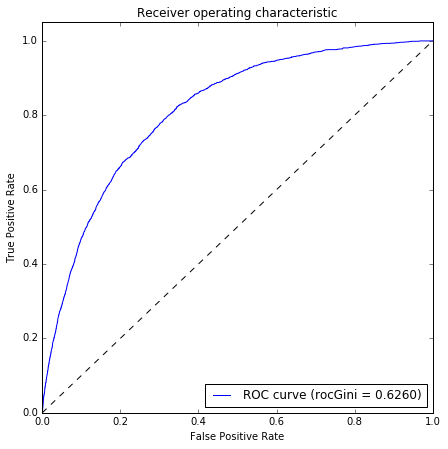

-------------------------------------------------------------
dm:


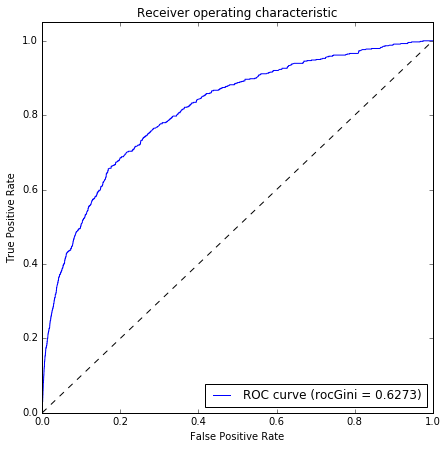

In [37]:
print('-------------------------------------------------------------')
print("Kari:")
sf.rocCurve(yKari,pr_kari)
print('-------------------------------------------------------------')
print("dm:")
sf.rocCurve(ydm,pr_dm)


# reject

In [16]:
def bucketRate(y_true,y_score,buckets=10):
    y_true = np.array(y_true)
    y_score = np.array(y_score)
    ysz = y_true.size
    ysm = y_true.sum()
    desc_score_indices = np.argsort(y_score, kind="mergesort") #[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]
    ixsSec = [int(ysz*(i/buckets))-1 for i in range(1,buckets+1)]
    ixsFirst = [0] + ixsSec[:-1]
    cummBadRate = []
    curBadRate = []
    cutOff = []
    for i in range(buckets):
        cummBadRate.append(y_true[:ixsSec[i]].mean())
        curBadRate.append(y_true[ixsFirst[i]:ixsSec[i]].mean())
        cutOff.append(y_score[ixsSec[i]])
    
    arBorders = np.arange(0, 1, 1/buckets) + 1/buckets
    arBorders = list(map(lambda x: round(x,0), list(arBorders*100)) )
    arBordersCur = list(map(lambda x,y: str(int(x)) + "-" + str(int(y)), [0]+arBorders[:-1], arBorders))
    cummBadRate = list(map(lambda x: round(x*100,1) ,cummBadRate))
    curBadRate = list(map(lambda x: round(x*100,1) ,curBadRate))
    
    df = pd.DataFrame({'AR_cum':arBorders, 'cumBadRate':cummBadRate,
                       'AR_cur': arBordersCur, 'curBadRate':curBadRate,
                      'CutOff': cutOff}).sort_values('AR_cum'
                    , ascending=False).reindex_axis(['AR_cum','cumBadRate','AR_cur','curBadRate','CutOff'], axis=1)
    return  df

def decAR(x,brr):
    l = len(brr)
    for i in range(1,l+1):
        if x <= brr[l-i]:
            return float(i) * 100 / l
        
def woeOutput(woeInfoTrans,goodColumns,coef_,factor):
    woeInfoOutput = woeInfoTrans.copy()
    goodC = [x[:-4] for x in goodColumns]
    d = dict(zip(goodC,coef_.tolist()[0]))
    woeInfoOutput = woeInfoOutput[woeInfoOutput['variable'].isin(list(d.keys()))]
    woeInfoOutput['coef'] = ''
    for var in d:
        woeInfoOutput.loc[woeInfoOutput['variable']==var,'coef']=d[var]
    woeInfoOutput['scorValue'] = -woeInfoOutput['WOE']*woeInfoOutput['coef']*factor    
    woeInfoOutput = woeInfoOutput[['variable','minVal','maxVal','scorValue']]
    return woeInfoOutput

def getScoringColumn(srcRow,woeOutp,intercept):
    woeOut=woeOutp.copy()
    woeOut['varInit'] = woeOut.variable.apply(lambda x: x if x[-4:]!='_cat' else x[:-4])
    variables = list(woeOut.varInit.unique())
    ans = intercept
    for var in variables:
        #print(var)
        woeVar = woeOut[woeOut.varInit==var]
        if np.isnan(srcRow[var]):
            ans += woeVar.loc[woeVar.minVal.isnull(),'scorValue'].values[0]
        else:
            woeVar = woeVar[woeVar.minVal.notnull()]
            maxVals = zip(list(woeVar.minVal)[1:]+[1000000],list(woeVar.scorValue))
            for i,j in maxVals:
                if srcRow[var] < i:
                    ans+=j
                    #print('srcRow[var] = %s, scorVal = %s' %(srcRow[var],j))
                    break
            else: 
                ans+=list(woeVar['scorValue'])[-1]
                #print(list(woeVar['scorValue'])[-1])
    return ans

def woeProduction(woeOutp):
    woeOut = woeOutp.copy()
    woeOut['varInit'] = woeOut.variable.apply(lambda x: x if x[-4:]!='_cat' else x[:-4] )
    variables = list(woeOut.varInit.unique())
    for var in variables:
        woeOut.loc[(woeOut.varInit==var)&(woeOut.maxVal.notnull()),
                   'maxVal'] = list(woeOut.loc[(woeOut.varInit==var)&(woeOut.minVal.notnull()),'minVal'])[1:] + [100000000]
    woeOut = woeOut[['varInit','maxVal','scorValue']]
    return woeOut 

rs = np.random.random_sample(1000000)
np.savetxt('rand.out',rs, delimiter=',')

In [17]:
#learn at <100% clients

goodColumnsDecl = goodColumns.copy()
goodColumnsDecl.remove('badFpd')
goodColumnsDecl.append('FirstDeclineRule')
declPostWoe = sf.ootTransform(decl,clustInfo,woeInfoTrans,goodColumnsDecl)

Xdecl = declPostWoe[preLRvar.columns].values
pr_decl = lr.predict_proba(Xdecl)[:,1]
declPostWoe['scoring'] = pr_decl
declPostWoe = pd.merge(declPostWoe,firstDeclineRule)

brr = bucketRate(preLR[badFlag],lr.predict_proba(X)[:,1],buckets=100)
brrCo = list(brr.CutOff)
declPostWoe['AR_cum'] = (declPostWoe.scoring).apply(decAR,args=[brrCo])
declPostWoe = pd.merge(declPostWoe,brr[['AR_cum','curBadRate']],how='left')

rso = np.loadtxt('rand.out',delimiter=',')

declPostWoe['rand'] = rso[:len(declPostWoe)]*100
declPostWoe['badRand'] = (declPostWoe.curBadRate*declPostWoe.badCoeff - declPostWoe.rand).apply(lambda x: 0.0 if x < 0 else 1.0)
ydeclAll = declPostWoe['badRand']
XdeclAll = Xdecl.copy()
allDeclinesSize = len(declPostWoe)
declPostWoe = declPostWoe[declPostWoe['AR_cum']<100]
p99DeclinesSize = len(declPostWoe)
Xdecl = declPostWoe[preLRvar.columns].values
ydecl = declPostWoe['badRand']

In [18]:
p99DeclinesSize, allDeclinesSize, p99DeclinesSize/allDeclinesSize*100

(58876, 71869, 81.92127342804268)

In [19]:
Xtotal = np.concatenate((X,Xdecl),axis=0)
ytotal = np.concatenate((y,ydecl),axis=0)

Xall = np.concatenate((X,XdeclAll),axis=0)
yall = np.concatenate((y,ydeclAll),axis=0)

lrTotal = LogisticRegression(C=0.1)
lrTotal.fit(Xtotal,ytotal)
prTotal = lrTotal.predict_proba(Xtotal)[:,1]
prAll = lrTotal.predict_proba(Xall)[:,1]
prDecl = lrTotal.predict_proba(Xdecl)[:,1]
prApp = lrTotal.predict_proba(X)[:,1]

------------------------------------------------------------
Total:


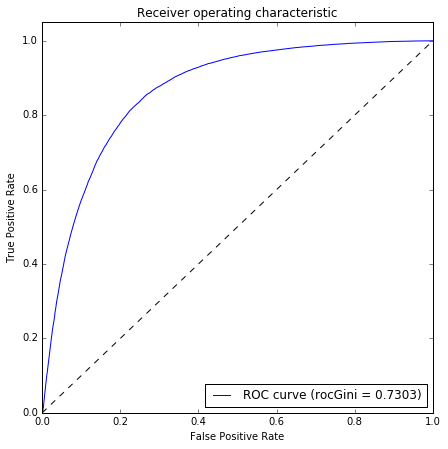

------------------------------------------------------------
Approve:


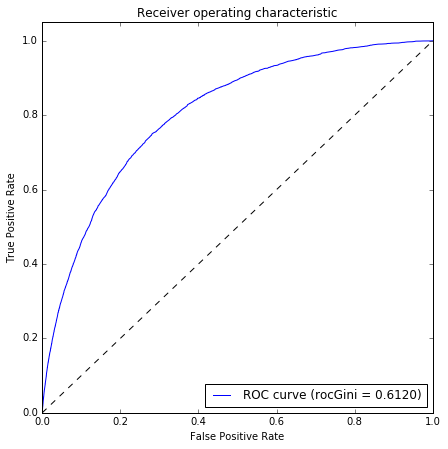

------------------------------------------------------------
Decline:


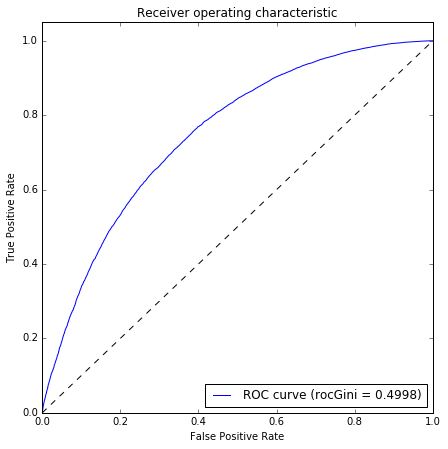

------------------------------------------------------------
All:


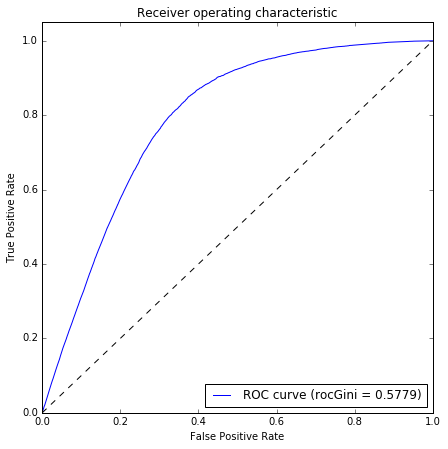

In [20]:
print('-'*60)
print("Total:")
sf.rocCurve(ytotal,prTotal)
print('-'*60)
print("Approve:")
sf.rocCurve(y,prApp)
print('-'*60)
print("Decline:")
sf.rocCurve(ydecl,prDecl)
print('-'*60)
print("All:")
sf.rocCurve(yall,prAll)

In [21]:
factor = 20 / log(2)
offset = 600 - (factor*log(50))

intercept = -(lrTotal.intercept_/len(lrTotal.coef_[0]))*factor + offset/len(lrTotal.coef_[0])
intercept = intercept[0]*len(lrTotal.coef_[0])
intercept

559.50687475581992

In [22]:
lrTotal.coef_

array([[ 0.01452445,  0.00183197,  0.0062245 ,  0.01078062,  0.00555916,
         0.00513188,  0.01205141,  0.01057724,  0.00413407,  0.01128249,
         0.0067543 ,  0.01190177,  0.01492177]])

In [23]:
woeOut = woeOutput(woeInfoTrans,goodColumns,lrTotal.coef_,factor)

In [32]:
wo = woeOutput(woeInfoTrans,goodColumns,lrTotal.coef_,factor)

In [37]:
def woeProduction(woeOutp):
    woeOut = woeOutp.copy()
    woeOut['varInit'] = woeOut.variable.apply(lambda x: x if x[-4:]!='_cat' else x[:-4] )
    variables = list(woeOut.varInit.unique())
    for var in variables:
        woeOut.loc[(woeOut.varInit==var)&(woeOut.maxVal.notnull()),
                   'maxVal'] = list(woeOut.loc[(woeOut.varInit==var)&(woeOut.maxVal.notnull()),'minVal'])[1:] + [100000000]
    woeOut = woeOut[['varInit','maxVal','scorValue']]
    return woeOut

In [33]:
woeProd = woeProduction(wo)

In [40]:
woeProd.to_excel('varTransform.xlsx',index=False)

# allLoans

In [117]:
dftr = pd.read_csv('srcTrans.csv')
dftrCl = pd.read_csv('srcTransClients.csv')
dftrCl.rename(columns={'badMob3':'bf'},inplace=True)
dftr = pd.concat([dftr,dftrCl],axis=1)
dftr = dftr[dftr.floan.notnull()]

In [24]:
goodColumns2 = [x for x in goodColumns if x!='badFpd']+['badMob3']

In [140]:
woeOut.to_csv('woeOut.csv',index=False)

In [123]:
dftr['scoring'] = dftr.apply(getScoringColumn,args=[woeOut,intercept],axis=1)

In [126]:
scorOut = dftr[['clientKey','badMob3','scoring']]

In [129]:
scorOut[scorOut.clientKey==3612]

,clientKey,badMob3,scoring
0,3612,1,537.813275


In [128]:
scorOut.to_csv('scorOut.txt',index=False)